# RISK-examples

This notebook, `examples.ipynb`, contains a collection of example scripts demonstrating the use of **RISK**, a Python package designed for biological network analysis. Each example illustrates different features and capabilities of RISK, helping users to explore and analyze biological networks effectively. Whether you're new to RISK or looking to deepen your understanding, these examples will guide you through various use cases and applications.

### Demonstration Using the Yeast PPI Network

In this notebook, we will utilize the comprehensive yeast protein-protein interaction (PPI) network published by Michaelis et al. in 2023. This dataset offers a highly structured interactome of *Saccharomyces cerevisiae*, consisting of 3,927 proteins connected by 31,004 interactions. The network is particularly valuable for exploring complex biological systems and understanding protein interactions at a large scale.

By applying the **RISK** package to this PPI network, we will demonstrate how to perform various analyses, including network clustering, interaction mapping, and identification of key protein complexes. This example will showcase the power of **RISK** in handling and deriving insights from large-scale biological networks.

**Importantly, this specific analysis and demonstration using the yeast PPI network has not been done before.** This makes our exploration both novel and uniquely valuable for researchers working in systems biology and proteomics.


---

## 0. Installing RISK

To get started with **RISK**, you'll need to install `risk-network` using `pip`. Run the following command in a code cell or terminal to install the package:


In [2]:
# !pip install risk-network==0.0.5

---

## 1. Importing RISK

After installing **RISK**, the next step is to import it into your notebook. You can verify that the installation was successful by checking the version of the package.


In [1]:
import risk

# Check the version of the RISK package to ensure it's installed correctly
risk.__version__

'0.0.5'

After verifying that the **RISK** package is installed and properly loaded, the next step is to import the `RISK` class. This class provides the core functionalities for performing biological network analysis.


In [3]:
from risk import RISK

To enable inline plotting in Jupyter notebooks, we'll use the `%matplotlib inline` magic command. This ensures that all plots generated during the analysis are displayed directly within the notebook.


In [4]:
%matplotlib inline

---

## 2. RISK Object Initialization

This code block initializes a **RISK** object with specific parameters. Below is a description of each parameter:


In [5]:
# Initialize the RISK object

risk = RISK()

---

## 3. Loading Graph Data for RISK Analysis

In this section, we demonstrate various methods for loading graph data into the **RISK** package, enabling comprehensive biological network analysis. The **RISK** package supports multiple input formats, providing flexibility in how you bring your network data into the framework. Below are examples of how to load networks from different sources:

- **Cytoscape Files (`.cys`)**: You can load networks directly from Cytoscape files using the `load_cytoscape_network` method. This method is particularly useful when working with complex networks that have been visualized or processed in Cytoscape. You can specify the source and target node labels, and optionally choose a specific view from the file.
- **Cytoscape JSON Files (`.cyjs`)**: If you have network data saved in a Cytoscape JSON format, the `load_cytoscape_json_network` method allows you to import the network while specifying the source and target labels to ensure correct interpretation of nodes and edges.
- **GPickle Files (`.gpickle`)**: Networks serialized into a `.gpickle` format can be easily reloaded using the `load_gpickle_network` method. This approach is ideal for preserving and reloading complex network structures without data loss.
- **NetworkX Graphs**: For those who have networks in a NetworkX graph object, the `load_networkx_network` method enables conversion to a RISK-compatible format. This optional step is convenient for integrating existing NetworkX-based workflows with the RISK package.


### Cytoscape Files (.cys)

- **`filepath`**: Path to the Cytoscape file containing the network.
- **`source_label`**: Attribute in the file representing the source nodes (e.g., starting points of edges).
- **`target_label`**: Attribute in the file representing the target nodes (e.g., endpoints of edges).
- **`view_name`**: Name of the specific view to load from the file, leave empty to load the default view.
- **`compute_sphere`**: Whether to compute the spherical representation.
- **`surface_depth`**: Depth of the surface for the analysis.
- **`min_edges_per_node`**: Minimum number of edges per node.
- **`include_edge_weight`**: Whether to include edge weights in the analysis.
- **`weight_label`**: Label for the edge weight attribute.


In [6]:
# Load the network from a Cytoscape file for RISK analysis

network = risk.load_cytoscape_network(
    filepath="./data/cytoscape/michaelis_2023.cys",  # Path to the Cytoscape file containing the network
    source_label="source",  # Attribute in the file representing the source nodes (e.g., starting points of edges)
    target_label="target",  # Attribute in the file representing the target nodes (e.g., endpoints of edges)
    view_name="",  # Name of the specific view to load from the file, leave empty to load the default view
    include_edge_weight=False,  #  Whether to include edge weights in the analysis (default is True)
    weight_label="weight",  #  Label for the edge weight attribute (default is "weight")
    min_edges_per_node=0,  #  Minimum number of edges per node (default is 0)
    compute_sphere=True,  #  Whether to compute node distances as a spherical representation (default is True)
    surface_depth=0.1,  #  Depth of the surface for the analysis (default is 0.0)
)

---------------
Loading network
---------------
Filetype: Cytoscape
Filepath: ./data/cytoscape/michaelis_2023.cys
Edge weight: Excluded
Projection: Sphere
Surface depth: 0.1


### Cytoscape JSON Files (.cyjs)

- **`filepath`**: Path to the Cytoscape JSON file containing the network.
- **`source_label`**: Label for the source nodes in the network (e.g., the starting point of edges).
- **`target_label`**: Label for the target nodes in the network (e.g., the endpoint of edges).
- **`compute_sphere`**: Whether to compute the spherical representation.
- **`surface_depth`**: Depth of the surface for the analysis.
- **`min_edges_per_node`**: Minimum number of edges per node.
- **`include_edge_weight`**: Whether to include edge weights in the analysis.
- **`weight_label`**: Label for the edge weight attribute.


In [5]:
# Load the network from a Cytoscape JSON file for RISK analysis

network = risk.load_cytoscape_json_network(
    filepath="./data/cyjs/michaelis_2023.cyjs",  # Path to the Cytoscape JSON file containing the network
    source_label="source",  # Attribute in the file representing the source nodes (e.g., starting points of edges)
    target_label="target",  # Attribute in the file representing the target nodes (e.g., endpoints of edges)
    include_edge_weight=False,  #  Whether to include edge weights in the analysis (default is True)
    weight_label="weight",  #  Label for the edge weight attribute (default is "weight")
    min_edges_per_node=0,  #  Minimum number of edges per node (default is 0)
    compute_sphere=True,  #  Whether to compute node distances as a spherical representation (default is True)
    surface_depth=0.1,  #  Depth of the surface for the analysis (default is 0.0)
)

---------------
Loading network
---------------
Filetype: Cytoscape JSON
Filepath: ./data/cyjs/michaelis_2023.cyjs
Projection: Sphere
Surface depth: 0.1
Edge weight: Excluded
Minimum edges per node: 0


### GPickle Files (.gpickle)

- **`compute_sphere`**: Whether to compute the spherical representation.
- **`surface_depth`**: Depth of the surface for the analysis.
- **`min_edges_per_node`**: Minimum number of edges per node.
- **`include_edge_weight`**: Whether to include edge weights in the analysis.
- **`weight_label`**: Label for the edge weight attribute.

In [8]:
# Load the network from a GPickle file for RISK analysis

network = risk.load_gpickle_network(
    filepath="./data/gpickle/michaelis_2023.gpickle",  # Path to the gpickle file containing the pre-saved network
    include_edge_weight=False,  #  Whether to include edge weights in the analysis (default is True)
    weight_label="weight",  #  Label for the edge weight attribute (default is "weight")
    min_edges_per_node=0,  #  Minimum number of edges per node (default is 0)
    compute_sphere=True,  #  Whether to compute node distances as a spherical representation (default is True)
    surface_depth=0.1,  #  Depth of the surface for the analysis (default is 0.0)
)

---------------
Loading network
---------------
Filetype: GPickle
Filepath: ./data/gpickle/michaelis_2023.gpickle
Projection: Sphere
Surface depth: 0.1
Edge weight: Excluded
Minimum edges per node: 0


### NetworkX Graphs

- **`G`**: The NetworkX graph object to be converted for use with the RISK package.
- **`compute_sphere`**: Whether to compute the spherical representation.
- **`surface_depth`**: Depth of the surface for the analysis.
- **`min_edges_per_node`**: Minimum number of edges per node.
- **`include_edge_weight`**: Whether to include edge weights in the analysis.
- **`weight_label`**: Label for the edge weight attribute.


In [8]:
# Load the network from a NetworkX graph for RISK analysis

network = risk.load_networkx_network(
    G=network  # The NetworkX graph object to be converted for use with the RISK package
    include_edge_weight=False,  #  Whether to include edge weights in the analysis (default is True)
    weight_label="weight",  #  Label for the edge weight attribute (default is "weight")
    min_edges_per_node=0,  #  Minimum number of edges per node (default is 0)
    compute_sphere=True,  #  Whether to compute node distances as a spherical representation (default is True)
    surface_depth=0.1,  #  Depth of the surface for the analysis (default is 0.0)
)


---------------
Loading network
---------------
Filetype: NetworkX
Project to sphere: True
Surface depth: 0.5
Edge length threshold: 0.25
Include edge weights: False
Minimum edges per node: 0


---

## 4. Loading and Associating Annotations with the Network

In this section, we demonstrate how to load various types of annotations and associate them with the network for comprehensive analysis using the **RISK** package. Annotations provide additional context to the network by linking nodes to specific biological terms, such as Gene Ontology (GO) terms.

### Supported Annotation Formats:
1. **JSON Annotations**:
   - Load annotations stored in a JSON file and associate them with the network.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.json`.
2. **CSV Annotations**:
   - Load annotations stored in a CSV file, where columns are separated by a custom delimiter.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.csv`.
3. **TSV Annotations**:
   - Load annotations stored in a TSV file, using tab-separated values for the columns.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.tsv`.
4. **Excel Annotations**:
   - Load annotations from a specified sheet in an Excel file, allowing integration of data stored in spreadsheets.
   - Example: GO Biological Process (BP) annotations stored in `go_biological_process.xlsx`.


### JSON Files (.json)

- **`filepath`**: Path to the JSON file containing GO BP annotations.
- **`network`**: The network object to which the GO BP annotations will be associated.


In [7]:
# Load GO Biological Process (BP) annotations from a JSON file and associate them with the existing network

annotations = risk.load_json_annotation(
    filepath="./data/json/annotations/go_biological_process.json",  # Path to the JSON file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
)

# Note: You can also load other GO annotations, such as:
# - 'go_cellular_component.json' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.json' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: JSON
Filepath: ./data/json/annotations/go_biological_process.json


### CSV Files (.csv)

- **`filepath`**: Path to the CSV file containing GO BP annotations.
- **`network`**: The network object to which the GO BP annotations will be associated.
- **`label_colname`**: The column name in the CSV file that contains the labels (e.g., GO terms).
- **`nodes_colname`**: The column name in the CSV file that contains the nodes associated with each label.
- **`nodes_delimiter`**: The delimiter used to separate nodes in the 'nodes' column.


In [8]:
# Load GO Biological Process (BP) annotations from a CSV file and associate them with the existing network

annotations = risk.load_csv_annotation(
    filepath="./data/csv/annotations/go_biological_process.csv",  # Path to the CSV file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the CSV file that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the CSV file that contains the nodes associated with each label
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.csv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.csv' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: CSV
Filepath: ./data/csv/annotations/go_biological_process.csv


### TSV Files (.tsv)

- **`filepath`**: Path to the TSV file containing GO BP annotations.
- **`network`**: The network object to which the GO BP annotations will be associated.
- **`label_colname`**: The column name in the TSV file that contains the labels (e.g., GO terms).
- **`nodes_colname`**: The column name in the TSV file that contains the nodes associated with each label.
- **`nodes_delimiter`**: The delimiter used to separate nodes in the 'nodes' column.


In [14]:
# Load GO Biological Process (BP) annotations from a TSV file and associate them with the existing network

annotations = risk.load_tsv_annotation(
    filepath="./data/tsv/annotations/go_biological_process.tsv",  # Path to the TSV file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the TSV file that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the TSV file that contains the nodes associated with each label
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.tsv' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.tsv' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: TSV
Filepath: ./data/tsv/annotations/go_biological_process.tsv


### Excel Files (.xlsx, .xls)

- **`filepath`**: Path to the Excel file containing GO BP annotations.
- **`network`**: The network object to which the GO BP annotations will be associated.
- **`label_colname`**: The column name in the Excel sheet that contains the labels (e.g., GO terms).
- **`nodes_colname`**: The column name in the Excel sheet that contains the nodes associated with each label.
- **`sheet_name`**: The name of the sheet in the Excel file from which to load the annotations.
- **`nodes_delimiter`**: The delimiter used to separate nodes in the 'nodes' column.


In [15]:
# Load GO Biological Process (BP) annotations from an Excel file and associate them with the existing network

annotations = risk.load_excel_annotation(
    filepath="./data/excel/annotations/go_biological_process.xlsx",  # Path to the Excel file containing GO BP annotations
    network=network,  # The network object to which the GO BP annotations will be associated
    label_colname="label",  # The column name in the Excel sheet that contains the labels (e.g., GO terms)
    nodes_colname="nodes",  # The column name in the Excel sheet that contains the nodes associated with each label
    sheet_name="Sheet1",  # The name of the sheet in the Excel file from which to load the annotations
    nodes_delimiter=";",  # The delimiter used to separate nodes in the 'nodes' column
)

# Note: You can also load other GO annotations using similar filenames, such as:
# - 'go_cellular_component.xlsx' for GO Cellular Component (CC) annotations
# - 'go_molecular_function.xlsx' for GO Molecular Function (MF) annotations

-------------------
Loading annotations
-------------------
Filetype: Excel
Filepath: ./data/excel/annotations/go_biological_process.xlsx


---

## 5. Statistical Tests for Annotation Enrichment Calculation

In this section, we introduce three statistical tests for assessing annotation enrichment and depletion within biological networks. These tests allow for rigorous evaluation of network substructures and their associated annotations, providing insights into the significance of observed enrichment patterns. Below are examples of how to apply each of these methods:

- **Permutation Test**: The permutation test reshuffles the annotation data to create a null distribution. This method is used to evaluate the statistical significance of observed annotation enrichment or depletion within a network. The `load_neighborhoods_by_permutation` method allows you to specify the number of permutations, random seed, and other parameters to control the test.

- **Fisher's Exact Test**: Fisher's exact test is designed for categorical data and evaluates the significance of the association between annotations and network substructures. This method is suitable for analyzing small sample sizes where the assumptions of other statistical tests may not hold. The `load_neighborhoods_by_fisher_exact` method applies this test to calculate p-values for annotation enrichment and depletion.

- **Hypergeometric Test**: The hypergeometric test assesses the probability of observing a specific number of annotated nodes in a subnetwork, given the overall annotation distribution. It is used in scenarios involving finite populations, such as gene sets or pathway analyses. The `load_neighborhoods_by_hypergeom` method facilitates this test, allowing you to quantify the significance of annotation enrichment within a network context.


### `load_neighborhoods_by_permutation`

- **`network`**: The network object for which to calculate neighborhood enrichment.
- **`annotations`**: The annotations linked to the network for enrichment analysis.
- **`distance_metric`**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm.
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution`**: Resolution parameter for the Louvain method. Default is 0.1.
- **`edge_length_threshold`**: Threshold for edge lengths, with values ranging from 0 to 1. Default is 0.5.
- **`score_metric`**: Metric used to score neighborhoods. Options include:
  - `'sum'`: Sums the annotation values within each neighborhood.
  - `'stdev'`: Computes the standard deviation of annotation values within each neighborhood.
  - `'z_score'`: Calculates the Z-score for neighborhood annotation values.
- **`null_distribution`**: Defines the type of null distribution to use for comparison. Options include:
  - `'network'`: Randomly permuted network structure.
  - `'annotations'`: Randomly permuted annotations.
- **`num_permutations`**: Number of permutations for generating the null distribution, which affects P-value accuracy.
- **`random_seed`**: Seed for random number generation to ensure reproducibility.
- **`max_workers`**: Number of parallel workers for computation, which improves performance on multicore systems.


In [8]:
# Perform annotation enrichment analysis by computing P-values for network neighborhoods using the permutation test

neighborhoods = risk.load_neighborhoods_by_permutation(
    network=network,  # The network object for which to calculate neighborhood enrichment
    annotations=annotations,  # The annotations linked to the network for enrichment analysis
    distance_metric="louvain",  #  Method used to compute distances (default is "dijkstra").
    #  OPTIONS: 'dijkstra', 'louvain', 'label_propagation',
    #  'markov_clustering', 'walktrap', 'spinglass'
    louvain_resolution=10,  #  Resolution parameter for the Louvain method (default is 0.1)
    edge_length_threshold=0.25,  #  Threshold for edge lengths, between 0 to 1 (default is 0.5)
    score_metric="stdev",  # Metric used to score neighborhoods; options: 'sum', 'stdev', 'z_score'
    null_distribution="network",  # Null distribution type; options: 'network', 'annotations'
    num_permutations=1000,  # Number of permutations for generating the null distribution, affects P-value accuracy
    random_seed=887,  # Seed for random number generation to ensure reproducibility
    max_workers=4,  # Number of parallel workers for computation, improves performance on multicore systems
)

------------------------
Running permutation test
------------------------
Distance metric: 'louvain (resolution=10)'
Edge length threshold: 0.25
Random seed: 887
Neighborhood scoring metric: 'stdev'
Null distribution: 'network'
Number of permutations: 1000
Maximum workers: 4


Total progress: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:54<00:00,  5.74it/s]


### `load_neighborhoods_by_fisher_exact`

- **`network`**: The network object for which to calculate neighborhood enrichment.
- **`annotations`**: The annotations linked to the network for enrichment analysis.
- **`distance_metric`**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm.
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution`**: Resolution parameter for the Louvain method. Default is 0.1.
- **`edge_length_threshold`**: Threshold for edge lengths, with values ranging from 0 to 1. Default is 0.5.
- **`random_seed`**: Seed for random number generation to ensure reproducibility.
- **`max_workers`**: Number of parallel workers for computation, which improves performance on multicore systems.


In [ ]:
# Perform annotation enrichment analysis by computing P-values for network neighborhoods using Fisher's exact test

neighborhoods = risk.load_neighborhoods_by_fisher_exact(
    network=network,  # The network object for which to calculate neighborhood enrichment
    annotations=annotations,  # The annotations linked to the network for enrichment analysis
    distance_metric="louvain",  #  Method used to compute distances (default is "dijkstra").
    #  OPTIONS: 'dijkstra', 'louvain', 'label_propagation',
    #  'markov_clustering', 'walktrap', 'spinglass'
    louvain_resolution=10,  #  Resolution parameter for the Louvain method (default is 0.1)
    edge_length_threshold=0.25,  #  Threshold for edge lengths, between 0 to 1 (default is 0.5)
    random_seed=887,  # Seed for random number generation to ensure reproducibility
    max_workers=4,  # Number of parallel workers for computation, improves performance on multicore systems
)

### `load_neighborhoods_by_hypergeom`

- **`network`**: The network object for which to calculate neighborhood enrichment.
- **`annotations`**: The annotations linked to the network for enrichment analysis.
- **`distance_metric`**: Method used to compute distances. Options include:
  - `'dijkstra'`: Computes shortest paths using Dijkstra's algorithm.
  - `'louvain'`: Applies the Louvain method for community detection.
  - `'label_propagation'`: Uses label propagation to find communities.
  - `'markov_clustering'`: Implements the Markov Clustering Algorithm.
  - `'walktrap'`: Detects communities via random walks.
  - `'spinglass'`: Community detection based on the spinglass model.
- **`louvain_resolution`**: Resolution parameter for the Louvain method. Default is 0.1.
- **`edge_length_threshold`**: Threshold for edge lengths, with values ranging from 0 to 1. Default is 0.5.
- **`random_seed`**: Seed for random number generation to ensure reproducibility.
- **`max_workers`**: Number of parallel workers for computation, which improves performance on multicore systems.


In [ ]:
# Perform annotation enrichment analysis by computing P-values for network neighborhoods using the hypergeometric test

neighborhoods = risk.load_neighborhoods_by_hypergeom(
    network=network,  # The network object for which to calculate neighborhood enrichment
    annotations=annotations,  # The annotations linked to the network for enrichment analysis
    distance_metric="louvain",  #  Method used to compute distances (default is "dijkstra").
    #  OPTIONS: 'dijkstra', 'louvain', 'label_propagation',
    #  'markov_clustering', 'walktrap', 'spinglass'
    louvain_resolution=10,  #  Resolution parameter for the Louvain method (default is 0.1)
    edge_length_threshold=0.25,  #  Threshold for edge lengths, between 0 to 1 (default is 0.5)
    random_seed=887,  # Seed for random number generation to ensure reproducibility
    max_workers=4,  # Number of parallel workers for computation, improves performance on multicore systems
)

---

## 6. Loading and Visualizing the Network Graph

The `load_graph` function in **RISK** allows you to generate a `NetworkGraph` object for visualization and analysis of the network. This function integrates various network components, such as annotations and neighborhood scores, and provides options to customize the clustering and visualization parameters.

### Parameters

- **`network`**: The network object containing the nodes and edges to be analyzed.
- **`annotations`**: The annotations associated with the network, typically derived from biological or functional data.
- **`neighborhoods`**: The neighborhoods object, which contains data on enrichment or depletion analysis.
- **`tail`**: Specifies the tail of the statistical test to use.
  - **Options**:
    - `'right'`: For enrichment.
    - `'left'`: For depletion.
    - `'both'`: For two-tailed analysis.
- **`pval_cutoff`**: A cutoff value for p-values to determine significance.
  - **Range**: Any value between 0 to 1.
- **`fdr_cutoff`**: The cutoff value for FDR-corrected p-values.
  - **Range**: Any value between 0 to 1.
- **`impute_depth`**: Specifies the depth at which to impute missing values.
  - **Range**: Any whole number greater than or equal to 0.
- **`prune_threshold`**: Threshold for pruning weak edges from the network graph.
  - **Range**: Any value between 0 to 1.
- **`linkage_criterion`**: The criterion to use for clustering.
  - **Options**:
    - `'distance'`: Clusters are formed based on distance.
    - `'maxclust'`: Clusters are formed based on the maximum number of clusters.
- **`linkage_method`**: The method used for hierarchical clustering.
  - **Options**:
    - `'auto'`: Automatically determines the optimal method.
    - Other options: `'single'`, `'complete'`, `'average'`, `'weighted'`, `'centroid'`, `'median'`, `'ward'`.
- **`linkage_metric`**: The distance metric used for clustering.
  - **Options**:
    - `'auto'`: Automatically determines the optimal metric.
    - Other options include: `'braycurtis'`, `'canberra'`, `'chebyshev'`, `'cityblock'`, `'correlation'`, `'cosine'`, `'dice'`, `'euclidean'`, `'hamming'`, `'jaccard'`, `'jensenshannon'`, `'kulczynski1'`, `'mahalanobis'`, `'matching'`, `'minkowski'`, `'rogerstanimoto'`, `'russellrao'`, `'seuclidean'`, `'sokalmichener'`, `'sokalsneath'`, `'sqeuclidean'`, `'yule'`.
- **`min_cluster_size`**: The minimum size of clusters to be formed.
- **`max_cluster_size`**: The maximum size of clusters to be formed.


In [9]:
# Get the NetworkGraph object for plotting

graph = risk.load_graph(
    network=network,  # The network object containing the nodes and edges to be analyzed
    annotations=annotations,  # The annotations associated with the network, typically derived from biological or functional data
    neighborhoods=neighborhoods,  # The neighborhoods object for enrichment/depletion analysis
    tail="right",  # OPTIONS: right (enrichment), left (depletion), both; specifies the tail of the statistical test
    pval_cutoff=0.05,  # OPTIONS: Any value between 0 to 1; cutoff for p-values to determine significance
    fdr_cutoff=1.0,  # OPTIONS: Any value between 0 to 1; cutoff value for FDR-corrected p-values
    impute_depth=0,  # OPTIONS: Any whole number greater than or equal to 0; specifies the depth at which to impute missing values
    prune_threshold=0.25,  # OPTIONS: Any value between 0 to 1; threshold for pruning weak edges from the network graph
    linkage_criterion="distance",  # OPTIONS: distance, maxclust; criterion used for clustering
    linkage_method="average",  # OPTIONS: auto (automatically selects the optimal method),
    # single, complete, average, weighted, centroid, median, ward;
    # specifies the method for hierarchical clustering
    linkage_metric="yule",  # OPTIONS: auto (automatically selects the optimal metric),
    # braycurtis, canberra, chebyshev, cityblock, correlation, cosine,
    # dice, euclidean, hamming, jaccard, jensenshannon, kulczynski1,
    # mahalanobis, matching, minkowski, rogerstanimoto, russellrao,
    # seuclidean, sokalmichener, sokalsneath, sqeuclidean, yule;
    # specifies the distance metric used for clustering
    min_cluster_size=6,  # The minimum size of clusters to be formed
    max_cluster_size=1000,  # The maximum size of clusters to be formed
)

---------------------------------
Finding significant neighborhoods
---------------------------------
p-value cutoff: 0.05
FDR BH cutoff: 1.0
Significance tail: 'right' (enrichment)
------------------------
Processing neighborhoods
------------------------
Imputation depth: 0
Pruning threshold: 0.25
-----------------------
Finding top annotations
-----------------------
Min cluster size: 6
Max cluster size: 1000
-----------------------------------------
Optimizing distance threshold for domains
-----------------------------------------


Evaluating optimal linkage method and metric: 100%|████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00]


Linkage criterion: 'distance'
Linkage method: 'average'
Linkage metric: 'yule'
Optimal linkage threshold: 0.251


---

## 7. Initializing the NetworkPlotter

The `load_plotter` function in **RISK** initializes the `NetworkPlotter` object, which is used to visualize the network graph. You can customize various aspects of the plot, including the figure size, background color, and outline.

### Parameters

- **`graph`**: The `NetworkGraph` object that contains the network structure to be visualized.
- **`figsize`**: The size of the figure in inches.
- **`background_color`**: The background color of the plot.
- **`plot_outline`**: Whether to draw an outline around the network.
- **`outline_color`**: The color of the outline.
- **`outline_scale`**: The scale factor for the outline.
  - **Range**: Any value greater than 0.
- **`linestyle`**: The line style for the network perimeter circle.
  - **Options**:
    - `'solid'` or `'-'`: Solid line.
    - `'dashed'` or `'--'`: Dashed line.
    - `'dashdot'` or `'-.'`: Dash-dot line.
    - `'dotted'` or `':'`: Dotted line.
    - Other Matplotlib-supported linestyles.


In [10]:
# Turn interactive plotting off - this enables the graph to be built across multiple cells

import matplotlib.pyplot as plt

plt.ioff()

In [11]:
# Initialize the NetworkPlotter with the NetworkGraph object

plotter = risk.load_plotter(
    graph=graph,  # The NetworkGraph object to be visualized
    figsize=(15, 15),  # Size of the figure, specified as a tuple (width, height) in inches
    background_color="black",  # Background color of the plot
    plot_outline=True,  # Whether to draw an outline around the network plot
    outline_color="white",  # Color of the outline around the network plot
    outline_scale=1.05,  # Scaling factor for the outline, where >1 increases the outline size
    linestyle="dashed",  # Line style for the outline, options: 'solid', 'dashed', 'dashdot', 'dotted'
)

---------------
Loading plotter
---------------


## 7a. Plotting Network Nodes and Edges

The `plot_network` function in **RISK** allows you to visualize the network nodes and edges with various customization options.

### Parameters

- **`node_size`**: The size of the nodes in the plot.
- **`edge_width`**: The width of the edges in the plot.
- **`node_color`**: The color of the nodes in the plot.
- **`node_edgecolor`**: The color of the edges around each node.
- **`edge_color`**: The color of the edges connecting the nodes.
- **`node_shape`**: The shape of the nodes.
  - **Options**: 
    - `'o'`: Circle.
    - `'s'`: Square.
    - `'^'`: Triangle up.
    - `'v'`: Triangle down.
    - Other options include: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.
    
### Annotated Node Size Parameters (for param `node_size`)

- **`enriched_nodesize`**: The size for enriched nodes.
- **`nonenriched_nodesize`**: The size for non-enriched nodes.

### Annotated Node Color Parameters (for param `node_color`)

- **`cmap`**: The colormap to use for node colors.
- **`color`**: (Optional) A specific color to use for all nodes. **Warning**: If specified, this will overwrite the colormap (`cmap`).
- **`min_scale`**: The minimum scale for the colormap intensity.
- **`max_scale`**: The maximum scale for the colormap intensity.
- **`scale_factor`**: The exponent for scaling node colors based on enrichment values.
- **`nonenriched_color`**: The color for non-enriched nodes.
- **`random_seed`**: The seed for random number generation to ensure reproducibility of node colors.


In [18]:
# Optional: Plot network nodes and edges

plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(
        enriched_nodesize=100,  # Size for enriched nodes in the network
        nonenriched_nodesize=10,  # Size for non-enriched nodes in the network
    ),
    edge_width=0.0,  # Width of the edges connecting nodes; set to 0 to hide edges
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",  # Colormap to use for node colors
        min_scale=0.5,  # Minimum scale for the colormap opacity
        max_scale=1.0,  # Maximum scale for the colormap opacity
        scale_factor=1.0,  # Exponent for color scaling, where values > 1 increase contrast by dimming lower values
        nonenriched_color="white",  # Color for non-enriched nodes
        random_seed=887,  # Seed for random number generation to ensure reproducibility of colors
    ),
    node_edgecolor="black",  # Color of the edges around the nodes
    edge_color="white",  # Color of the edges connecting nodes
    node_shape="o",  # Shape of the nodes, e.g., 'o' for circle, '^' for triangle, 's' for square
)

## 7a. Plotting a Subnetwork

The `plot_subnetwork` function in **RISK** allows you to focus on and visualize a subset of the network nodes and their connecting edges.

### Parameters

- **`nodes`**: The list of node identifiers to include in the subnetwork plot.
- **`node_size`**: The size of the nodes in the subnetwork plot.
- **`edge_width`**: The width of the edges in the subnetwork plot.
- **`node_color`**: The color of the nodes in the subnetwork plot.
- **`node_edgecolor`**: The color of the edges around each node.
- **`edge_color`**: The color of the edges connecting the nodes.
- **`node_shape`**: The shape of the nodes in the subnetwork plot.
  - **Options**: 
    - `'o'`: Circle.
    - `'s'`: Square.
    - `'^'`: Triangle up.
    - `'v'`: Triangle down.
    - Other options include: `'p'`, `'P'`, `'h'`, `'H'`, `'8'`, `'d'`, `'D'`, `'>'`, `'<`, `'|'`, `'_'`.


In [19]:
# Optional: Plot network nodes and edges

plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],  # List of nodes to include in the subnetwork plot
    node_size=250,  # Size of the nodes in the plot
    edge_width=0.0,  # Width of the edges connecting nodes; set to 0 to hide edges
    node_color="white",  # Color of the nodes in the plot
    node_edgecolor="black",  # Color of the edges around the nodes
    edge_color="white",  # Color of the edges connecting nodes
    node_shape="^",  # Shape of the nodes, e.g., '^' for triangle, 'o' for circle, 's' for square
)

## 7b. Plotting Contours

The `plot_contours` function in **RISK** allows you to visualize density contours around the network nodes. This can help in identifying regions of high node density or clustering within the network.

### Parameters

- **`levels`**: The number of contour levels to draw.
  - **Range**: Integer value specifying the number of levels.
- **`bandwidth`**: The bandwidth used for kernel density estimation.
  - **Range**: Float value, typically between 0 and 1.
- **`grid_size`**: The size of the grid used for contour plotting.
  - **Range**: Integer value.
- **`alpha`**: The transparency level of the contours.
  - **Range**: Float value between 0 (fully transparent) and 1 (fully opaque).
- **`color`**: The color of the contours, which can be customized or automatically generated based on a colormap.

### Annotated Contour Color Parameters (for param `color`)

- **`cmap`**: The colormap to use for contour colors. For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected.
- **`color`**: (Optional) A specific color to use for all contours. **Warning**: If specified, this will overwrite the colormap (`cmap`). For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected.
- **`min_scale`**: The minimum scale for the colormap intensity.
- **`max_scale`**: The maximum scale for the colormap intensity.
- **`scale_factor`**: The exponent for scaling contour colors based on enrichment values.
- **`random_seed`**: The seed for random number generation to ensure reproducibility of contour colors.


In [20]:
# Optional: Plot contours

plotter.plot_contours(
    levels=5,  # Number of contour levels to plot
    bandwidth=0.8,  # Bandwidth parameter for kernel density estimation, controlling the smoothness of contours
    grid_size=250,  # Resolution of the grid used for contour plotting, affecting detail level
    alpha=0.2,  # Transparency level of the contours; 0 is fully transparent, 1 is fully opaque
    color=plotter.get_annotated_contour_colors(cmap="gist_rainbow", random_seed=887),
    # Color(s) of the contours, potentially generated using a colormap and random seed for consistency
)

## 7b. Plotting a Subcontour

The `plot_subcontour` function in **RISK** allows you to focus on and visualize the contours around a specific subset of nodes within the network. This can be useful for highlighting particular pathways or regions of interest.

### Parameters

- **`nodes`**: The list of node identifiers to include in the subcontour plot.
- **`levels`**: The number of contour levels to draw.
  - **Range**: Integer value specifying the number of levels.
- **`bandwidth`**: The bandwidth used for kernel density estimation.
  - **Range**: Float value, typically between 0 and 1.
- **`grid_size`**: The size of the grid used for contour plotting.
  - **Range**: Integer value.
- **`alpha`**: The transparency level of the contours.
  - **Range**: Float value between 0 (fully transparent) and 1 (fully opaque).
- **`color`**: The color of the contours, which can be specified directly.


In [21]:
# Optional: Plot subcontours

plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],  # List of nodes around which the contour will be drawn
    levels=5,  # Number of contour levels to plot
    bandwidth=0.8,  # Bandwidth parameter for kernel density estimation, controlling the smoothness of contours
    grid_size=250,  # Resolution of the grid used for contour plotting, affecting detail level
    alpha=0.2,  # Transparency level of the contours; 0 is fully transparent, 1 is fully opaque
    color="white",  # Color of the contours
)

## 7c. Optional: Plot Labels

The `plot_labels` method in the `NetworkPlotter` class is used to annotate the network with labels. This function provides various customization options to adjust the appearance and placement of labels within the network graph.

### Parameters

- **`perimeter_scale`**: Scaling factor for the perimeter around the network where labels may be placed.
  - **Range**: Any value greater than 0.
- **`offset`**: The offset distance for label placement relative to the nodes.
  - **Range**: Any value greater than 0.
- **`font`**: The font to use for the labels.
  - **Options**: Any valid font name (e.g., "Arial", "Times New Roman").
- **`fontsize`**: The size of the font used for the labels.
  - **Options**: Any integer value representing font size.
- **`fontcolor`**: The color of the font used for the labels.
  - **Options**: Any valid color name or hex code (e.g., "white", "#FFFFFF").
- **`arrow_linewidth`**: The width of the arrow lines used to point to nodes.
  - **Options**: Any value greater than 0.
- **`arrow_color`**: The color of the arrow lines used to point to nodes.
  - **Options**: Any valid color name or hex code (e.g., "white", "#FFFFFF").
- **`max_labels`**: The maximum number of labels to display in the network plot.
  - **Options**: Any integer value.
- **`max_words`**: The maximum number of words to include in each label.
  - **Options**: Any integer value representing the number of words.
- **`min_words`**: The minimum number of words to include in each label.
  - **Options**: Any integer value representing the number of words.
- **`max_word_length`**: The maximum number of characters allowed in a word for it to be included.
  - **Options**: Any integer value representing the character limit.
- **`min_word_length`**: The minimum number of characters required in a word for it to be included.
  - **Options**: Any integer value representing the character limit.
- **`words_to_omit`**: List of words to be excluded from the labels.
  - **Options**: A list of words (e.g., `["process", "biosynthetic"]`).
  
### Annotated Label Color Parameters (for params `fontcolor` and `arrow_color`)

- **`cmap`**: The colormap to use for label colors. For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected.
- **`color`**: (Optional) A specific color to use for all labels. **Warning**: If specified, this will overwrite the colormap (`cmap`). For domains with multiple nodes, the brightest color (based on the sum of RGB values) will be selected.
- **`min_scale`**: The minimum scale for the colormap intensity.
- **`max_scale`**: The maximum scale for the colormap intensity.
- **`scale_factor`**: The exponent for scaling label colors based on enrichment values.
- **`random_seed`**: The seed for random number generation to ensure reproducibility of label colors.


In [22]:
# Optional: Plot labels on the network

plotter.plot_labels(
    perimeter_scale=1.25,  # Scale factor for the perimeter around the network where labels can be placed
    offset=0.10,  # Distance offset for label placement relative to the nodes
    font="Arial",  # Font type to use for the labels
    fontsize=10,  # Size of the font for the labels
    fontcolor=plotter.get_annotated_label_colors(
        cmap="gist_rainbow", random_seed=887
    ),  # Option to use annotated label colors for font
    arrow_linewidth=1,  # Width of the arrows pointing to the nodes
    arrow_color="white",  # Color of the arrows pointing to the nodes
    max_labels=50,  # Maximum number of labels to display on the network
    max_words=4,  # Maximum number of words to include in each label
    min_words=2,  # Minimum number of words to include in each label
    max_word_length=30,  # Maximum number of characters allowed in a word
    min_word_length=3,  # Minimum number of characters required in a word
    words_to_omit=["process", "biosynthetic"],  # List of words to omit from the labels
)

## 7d. Optional: Plot Sublabel

The `plot_sublabel` method in the `NetworkPlotter` class is designed to annotate the network graph with a single label for a specified set of nodes. This method provides customization options for the label's appearance, positioning, and the arrow pointing to the nodes.

### Parameters

- **`nodes`**: List of node labels to be used for calculating the centroid.
  - **Input**: List of strings representing node labels.
- **`label`**: The label to be annotated on the network.
  - **Input**: String representing the label text.
- **`radial_position`**: Radial angle for positioning the label around the network's perimeter.
  - **Range**: 0-360 degrees.
- **`perimeter_scale`**: Scale factor for positioning the label around the perimeter.
  - **Range**: Any value greater than 0.
- **`offset`**: Offset distance for the label from the perimeter.
  - **Range**: Any value greater than 0.
- **`font`**: Font name for the label.
  - **Options**: Any valid font name (e.g., "Arial", "Times New Roman").
- **`fontsize`**: Font size for the label.
  - **Options**: Any integer value representing font size.
- **`fontcolor`**: Color of the label text.
  - **Options**: Any valid color name or hex code (e.g., "black", "#000000").
- **`arrow_linewidth`**: Line width of the arrow pointing to the centroid.
  - **Options**: Any value greater than 0.
- **`arrow_color`**: Color of the arrow.
  - **Options**: Any valid color name or hex code (e.g., "black", "#000000").


In [23]:
# Optional: Plot sublabels

plotter.plot_sublabel(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],  # List of nodes to annotate with the sublabel
    label="LSM1-7-PAT1 Complex",  # The text label to display on the network
    radial_position=73,  # Radial position in degrees for label placement around the nodes (0 to 360)
    perimeter_scale=1.6,  # Scale factor for the perimeter around the network where the sublabel can be placed; any value greater than 0
    offset=0.10,  # Distance offset for sublabel placement relative to the nodes; any value greater than 0
    font="Arial",  # Font type to use for the sublabel
    fontsize=14,  # Size of the font for the sublabel
    fontcolor="white",  # Color of the font for the sublabel
    arrow_linewidth=1.5,  # Width of the arrow pointing to the nodes
    arrow_color="white",  # Color of the arrow pointing to the nodes
)

## 7d. Plotting Utility Methods in NetworkPlotter

The `NetworkPlotter` class provides several static methods to manage the display, saving, and closing of plots. These methods directly interface with matplotlib functions, allowing for easy integration into plotting workflows.

#### `savefig` Method

The `savefig` method saves the current plot to a file. You can specify the filename, format, and other options.

- **Function**: `savefig(*args, **kwargs)`
- **Description**: Saves the current plot to a file.
- **Arguments**:
  - `*args`: Positional arguments passed to `plt.savefig`.
  - `**kwargs`: Keyword arguments passed to `plt.savefig`, such as filename and format.

#### `show` Method

The `show` method displays the current plot. This is typically the last step after configuring your plot.

- **Function**: `show(*args, **kwargs)`
- **Description**: Displays the current plot.
- **Arguments**:
  - `*args`: Positional arguments passed to `plt.show`.
  - `**kwargs`: Keyword arguments passed to `plt.show`.


In [24]:
# Optional: Save the plot to a file

# plotter.savefig("network_plot.png")

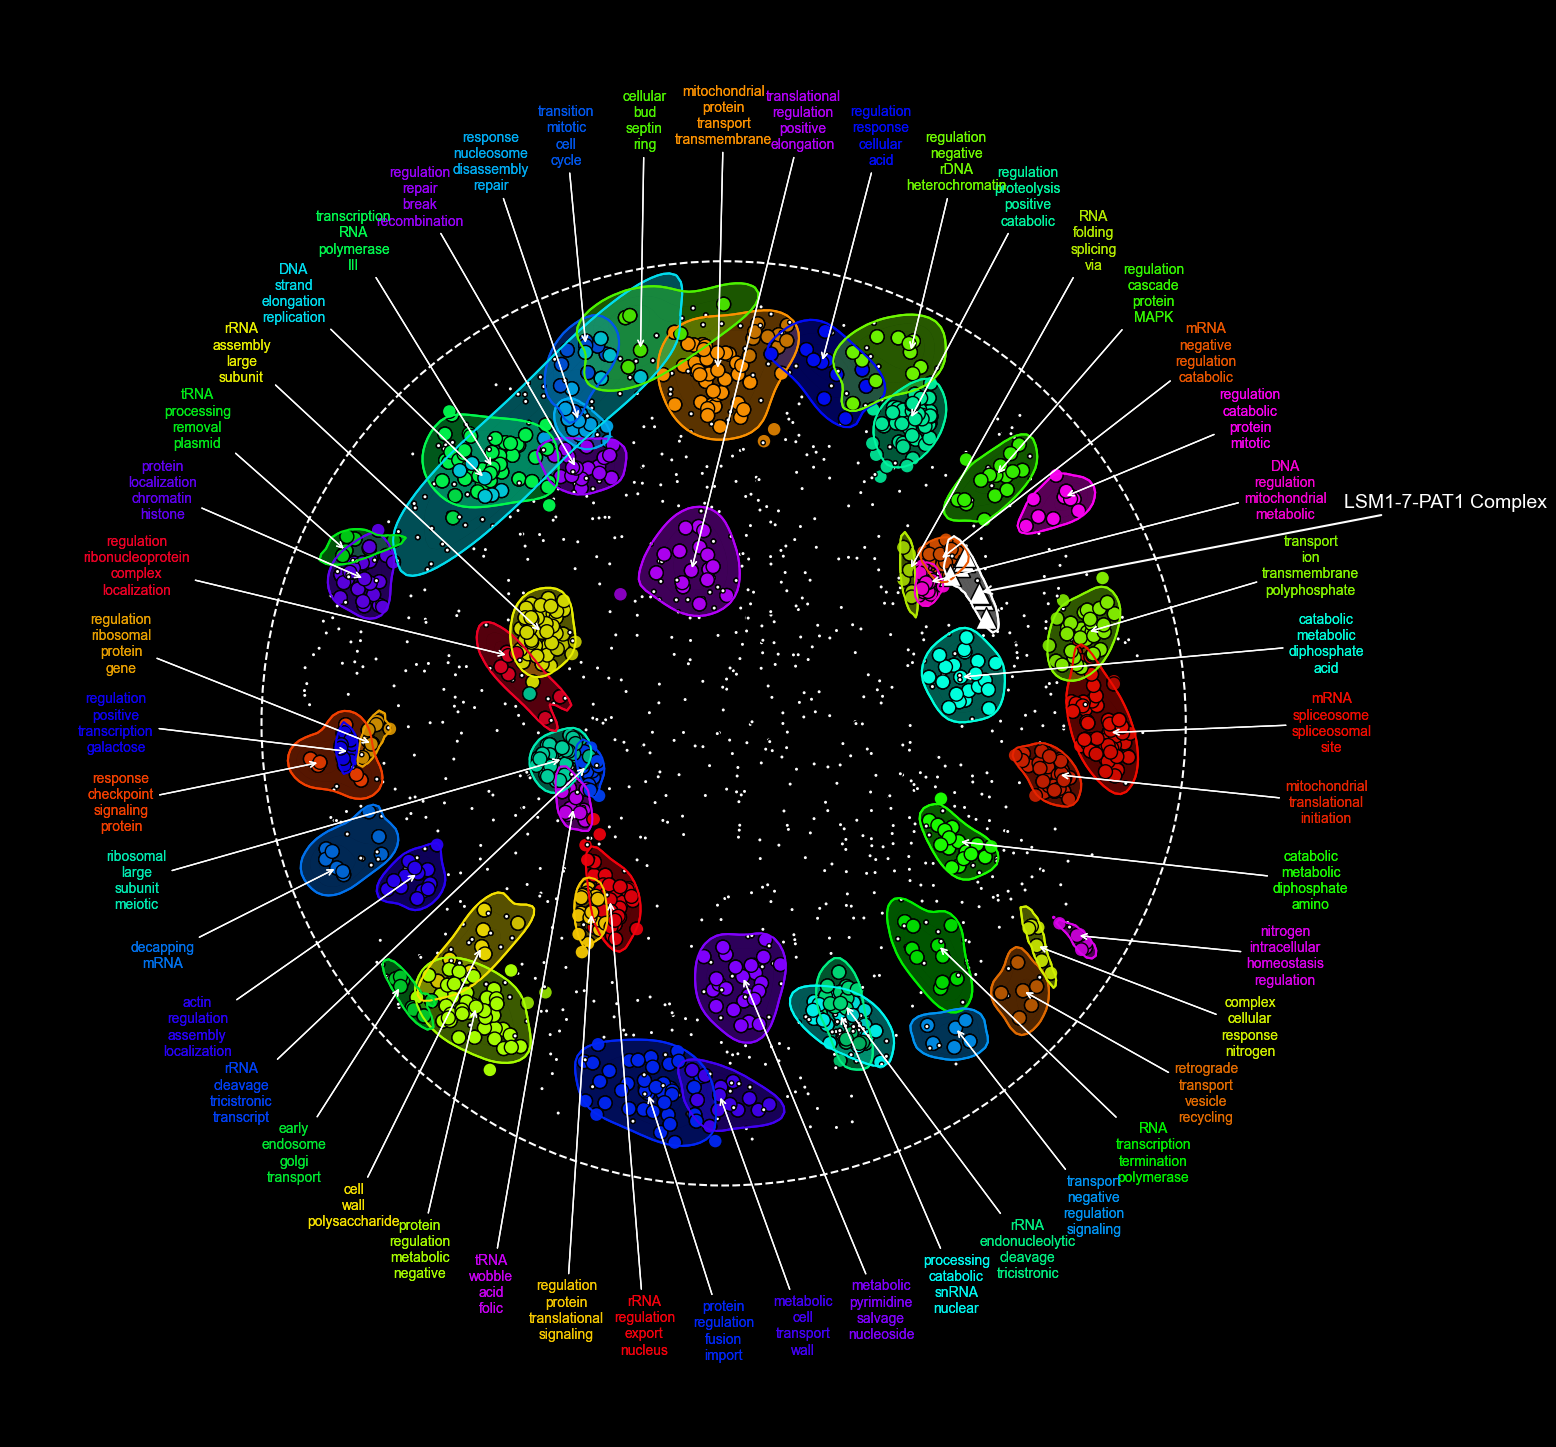

In [25]:
# Display the plot

plotter.show()

## 7. [Troubleshoot] Potential Plotting Issue in Jupyter Notebooks

When using the `NetworkPlotter` class in a Jupyter Notebook, you might encounter an issue where the plot is automatically displayed when the `plt.subplots` function is called during the initialization of the plot. This behavior can cause the plot to appear prematurely in the execution cell where it's called, even if you intend to display it later using `plotter.show()`.

If this occurs, refer to the following cell to correctly display the plot.


---------------
Loading plotter
---------------


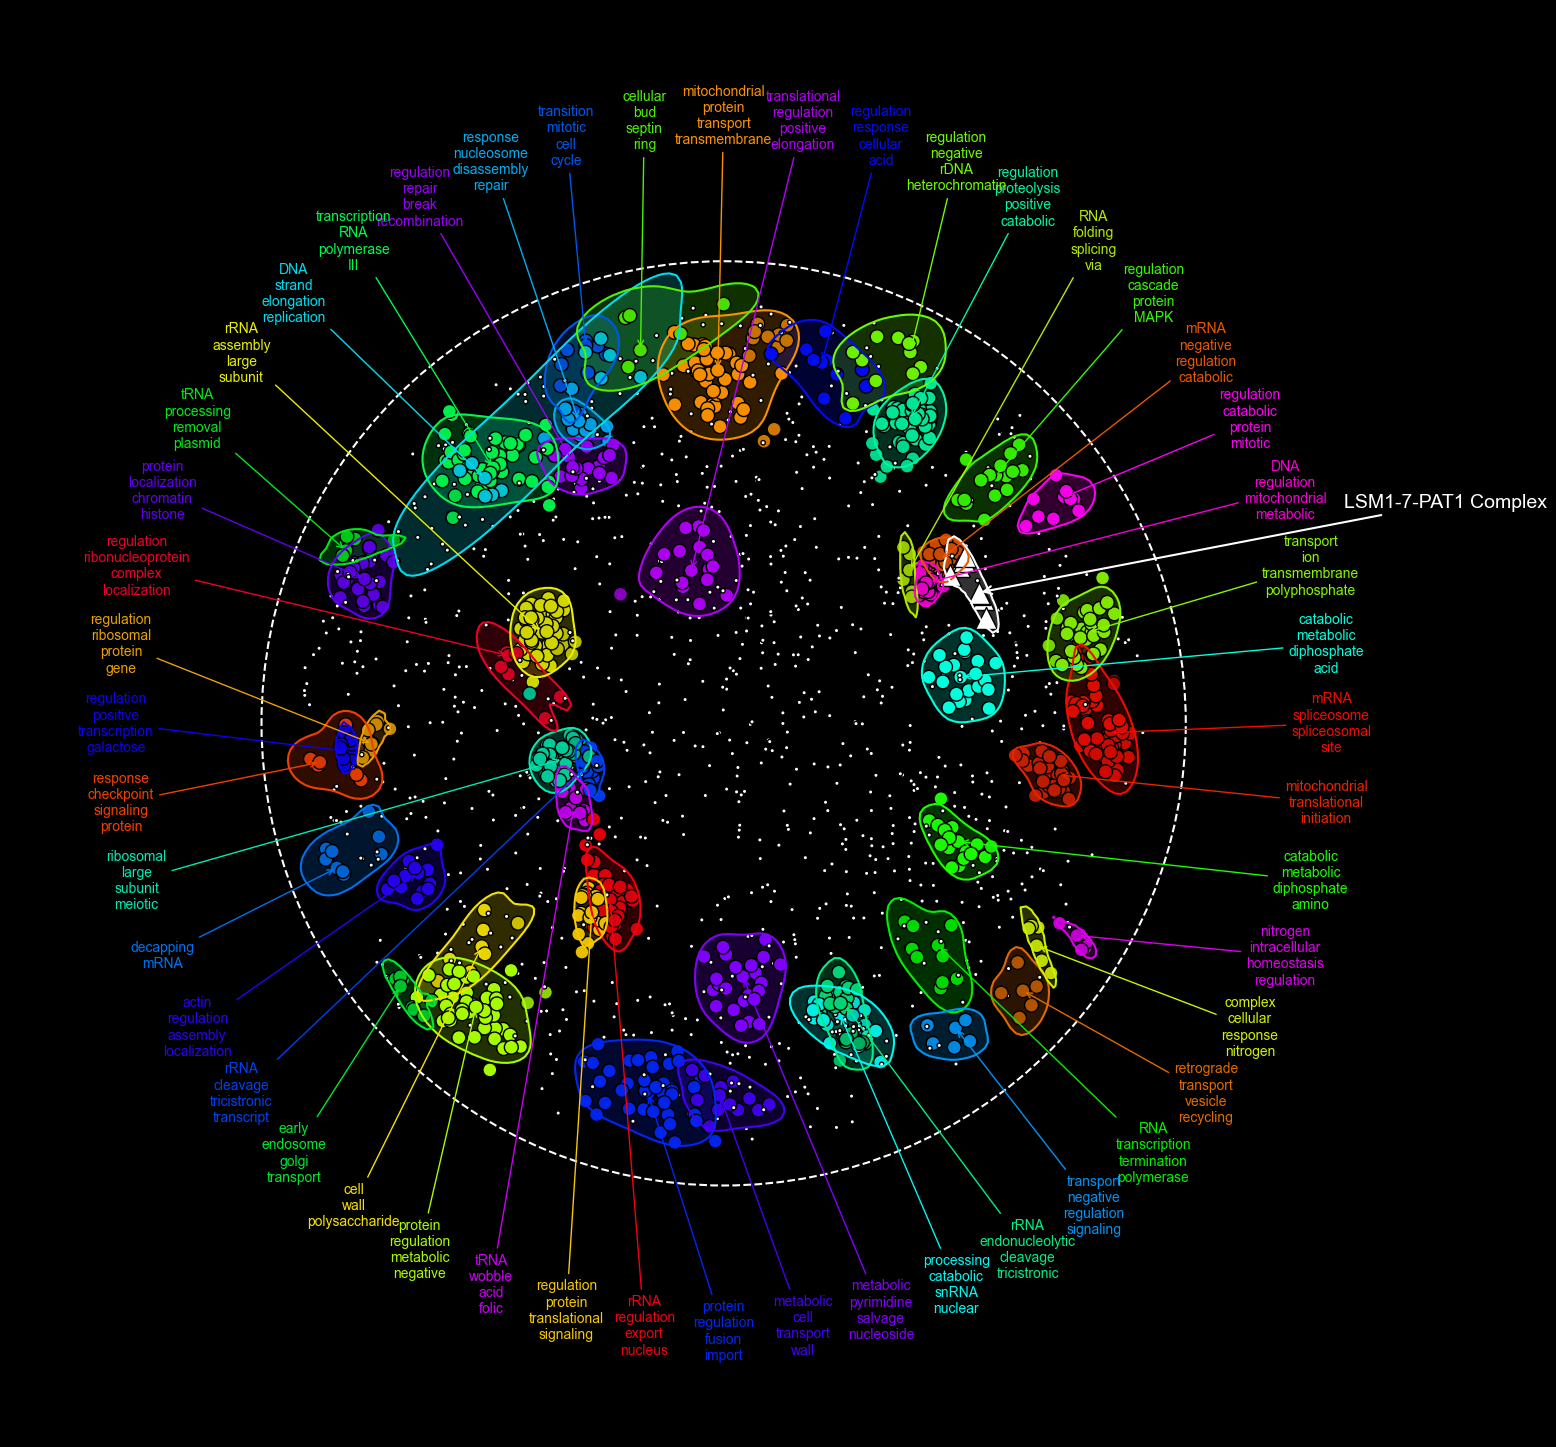

In [26]:
# Initialize the NetworkPlotter with the NetworkGraph object

plotter = risk.load_plotter(
    graph=graph,
    figsize=(15, 15),
    background_color="black",
    plot_outline=True,
    outline_color="white",
    outline_scale=1.05,
    linestyle="dashed",
)

# Optional: Plot network nodes and edges
plotter.plot_network(
    node_size=plotter.get_annotated_node_sizes(enriched_nodesize=100, nonenriched_nodesize=10),
    edge_width=0.0,
    node_color=plotter.get_annotated_node_colors(
        cmap="gist_rainbow",
        min_scale=0.5,
        max_scale=1.0,
        nonenriched_color="white",
        random_seed=887,
    ),
    node_edgecolor="black",
    edge_color="white",
    node_shape="o",
)

# Optional: Plot subnetwork
plotter.plot_subnetwork(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    node_size=250,
    edge_width=0.0,
    node_color="white",
    node_edgecolor="black",
    edge_color="white",
    node_shape="^",
)

# Optional: Plot contours
plotter.plot_contours(
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color=plotter.get_annotated_contour_colors(cmap="gist_rainbow", random_seed=887),
)

# Optional: Plot subcontour
plotter.plot_subcontour(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    levels=5,
    bandwidth=0.8,
    grid_size=250,
    alpha=0.2,
    color="white",
)

# Optional: Plot label
plotter.plot_labels(
    perimeter_scale=1.25,
    offset=0.10,
    font="Arial",
    fontsize=10,
    fontcolor=plotter.get_annotated_label_colors(cmap="gist_rainbow", random_seed=887),
    arrow_linewidth=1,
    arrow_color=plotter.get_annotated_label_colors(cmap="gist_rainbow", random_seed=887),
    max_labels=50,
    max_words=4,
    min_words=2,
    max_word_length=30,
    min_word_length=3,
    words_to_omit=["process", "biosynthetic"],
)

# Optional: Plot sublabels
plotter.plot_sublabel(
    nodes=[
        "LSM1",
        "LSM2",
        "LSM3",
        "LSM4",
        "LSM5",
        "LSM6",
        "LSM7",
        "PAT1",
    ],
    label="LSM1-7-PAT1 Complex",
    radial_position=73,
    perimeter_scale=1.6,
    offset=0.10,
    font="Arial",
    fontsize=14,
    fontcolor="white",
    arrow_linewidth=1.5,
    arrow_color="white",
)

# Finally, display the plot
plotter.show()

---

## 8. Overview of `risk.params`

In this section, we explore the `risk.params` module within the **RISK** package, which is essential for managing and exporting various parameters related to network analysis. This module offers multiple functionalities that allow you to configure, save, and share the parameters used in your analysis. Below are the key methods provided by the `risk.params` module:

- **Load Parameters**: The `load()` method allows you to import parameters from a predefined source, setting up the necessary configurations for your network analysis.
- **Export to CSV**: Using the `to_csv(filepath)` method, you can export the parameters to a CSV file. This method flattens any nested dictionaries, making the data easy to represent in a tabular format.
- **Export to JSON**: The `to_json(filepath)` method saves the parameters in a JSON file. This format maintains the structure of nested dictionaries, preserving the hierarchical nature of the data.
- **Export to Text**: The `to_txt(filepath)` method outputs the parameters to a plain text file. This approach organizes the data in a human-readable format with clearly defined sections.


## 8a. Loading Parameters


In [27]:
# Load the parameters into a dictionary

loaded_params = risk.params.load()
loaded_params

------------------
Loading parameters
------------------


{'annotations': {'filepath': './data/json/annotations/go_biological_process.json',
  'filetype': 'JSON'},
 'datetime': '2024-09-07 15:58:26',
 'graph': {'tail': 'right',
  'pval_cutoff': 0.05,
  'fdr_cutoff': 1.0,
  'impute_depth': 0,
  'prune_threshold': 0.25,
  'linkage_criterion': 'distance',
  'linkage_method': 'average',
  'linkage_metric': 'yule',
  'min_cluster_size': 6,
  'max_cluster_size': 1000},
 'neighborhoods': {'distance_metric': 'louvain',
  'louvain_resolution': 10,
  'edge_length_threshold': 0.25,
  'statistical_test_function': 'permutation',
  'score_metric': 'stdev',
  'null_distribution': 'network',
  'num_permutations': 1000,
  'random_seed': 887,
  'max_workers': 4},
 'network': {'compute_sphere': True,
  'surface_depth': 0.1,
  'min_edges_per_node': 0,
  'include_edge_weight': False,
  'weight_label': 'weight',
  'filetype': 'Cytoscape',
  'filepath': './data/cytoscape/michaelis_2023.cys'},
 'plotter': {'figsize': (15, 15),
  'background_color': 'black',
  'plot_

## 8b. Exporting Parameters to CSV

- **`filepath`**: Path to the CSV file where the parameters will be exported.


In [28]:
# Export parameters to a CSV file

risk.params.to_csv(
    filepath="./data/csv/params/michaelis_2023.csv"
)  # The file path where the CSV file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/csv/params/michaelis_2023.csv


## 8c. Exporting Parameters to JSON

- **`filepath`**: Path to the JSON file where the parameters will be exported.


In [29]:
# Export parameters to a JSON file

risk.params.to_json(
    filepath="./data/json/params/michaelis_2023.json"
)  # The file path where the JSON file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/json/params/michaelis_2023.json


## 8d. Exporting Parameters to Text

- **`filepath`**: Path to the text file where the parameters will be exported.


In [30]:
# Export parameters to a text file

risk.params.to_txt(
    filepath="./data/txt/params/michaelis_2023.txt"
)  # The file path where the text file will be saved

------------------
Loading parameters
------------------
Parameters successfully exported to filepath: ./data/txt/params/michaelis_2023.txt
